# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p496  (slighty modified)::

__"9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML])
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

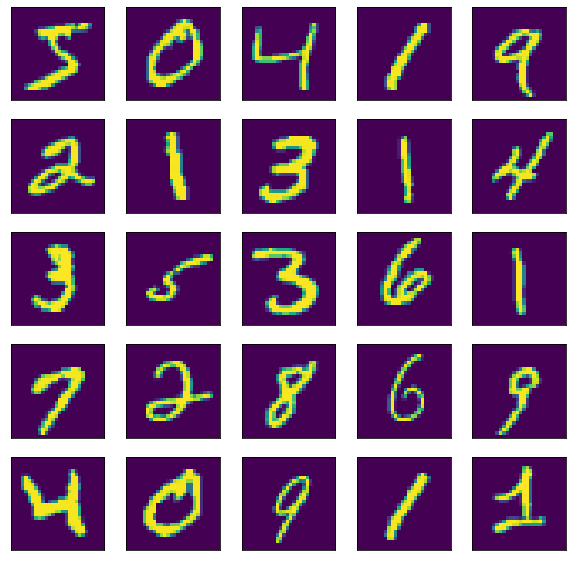

In [35]:
# TODO: CNN implemetation..
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                77450     
                                                                 
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
__________________________________________________

In [37]:
batch_size = 128
epochs = 10

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 0.2145 - accuracy: 0.9369 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0366 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0383 - val_accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0358 - val_accuracy: 0.9894
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0343 - val_accuracy:

313/313 - 1s - loss: 0.0372 - accuracy: 0.9897 - 859ms/epoch - 3ms/step


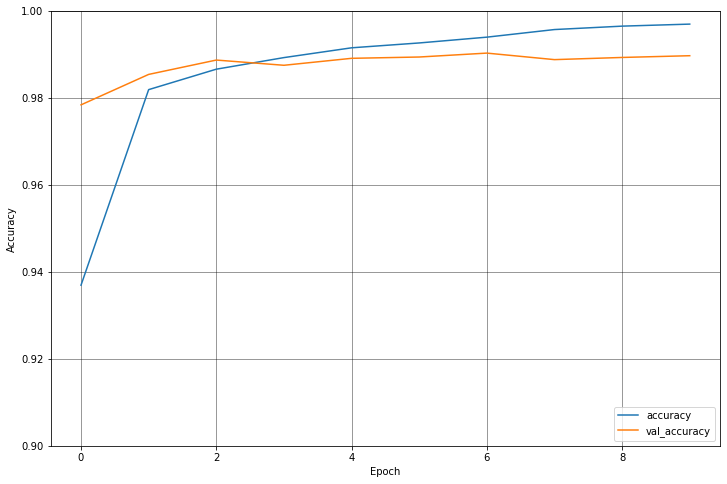

In [40]:
plt.rcParams['figure.figsize'] = (12,8)
fig = plt.figure()
plt.rc('grid', linestyle="-", color='black', alpha=0.5)
plt.grid()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
fig.savefig('accuracy.png')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


REVISIONS||
---------||
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
